# Poisson Distribution

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats

%matplotlib inline
plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def get_discrete_ticks(xmin, xmax):
    cuts = [5, 10, 20, 50, 100, 200, 500, 1000]
    ticks = np.arange(xmin, xmax + 1)
    if len(ticks) > 15:
        for cut in cuts:
            ticks = [tick for tick in ticks if tick % cut == 0]
            if len(ticks) <= 15:
                return ticks
        return ticks
    return ticks

In [3]:
def get_bins(xmin, xmax, step = 1):
    bins = np.arange(xmin, xmax, step)
    bins = bins if len(bins) > 2 else get_bins(xmin, xmax + 1, step)
    return bins if len(bins) <= 100 \
        else get_bins(xmin, xmax, step = step + 1)

In [4]:
def plot_discrete_distribution(f, x_axis, obs = None, q = None, **kwargs):
    pmf = f.pmf(x_axis, **kwargs)
    fig, ax = plt.subplots(figsize = (8, 4))
    bars = ax.bar(x_axis, pmf, edgecolor = "k", linewidth = 2)
    
    print(f"Mean: {f.mean(**kwargs)}")
    print(f"Median: {f.median(**kwargs)}")
    print(f"Variance: {f.var(**kwargs)}")
    print(f"Standard Deviation: {f.std(**kwargs)}")
    print("-" * 10)
    if obs:
        plt.setp(bars[obs - x_axis.min()], color = "r", linewidth = 2)
        plt.setp(bars[obs - x_axis.min()], edgecolor = "k")
        obs_pmf = f.pmf(obs, **kwargs)
        print(f"PMF({obs}) = {obs_pmf}")
        
    plt.xticks(get_discrete_ticks(xmin = x_axis.min(), xmax = x_axis.max()))
    plt.show()

In [5]:
def sample_discrete_distribution(f, size = 1, seed = None, **kwargs):
    sample = f.rvs(size = size, random_state = seed, **kwargs)
    
    print(f"Min: {np.min(sample)}")
    print(f"Mean: {np.mean(sample)}")
    print(f"Median: {np.median(sample)}")
    print(f"Max: {np.max(sample)}")
    print(f"Variance: {np.var(sample, ddof = 0)}")
    print(f"Standard Deviation: {np.std(sample, ddof = 0)}")
    
    fig, ax = plt.subplots(figsize = (8, 4))
   
    plt.hist(x = sample,
             density = True,
             edgecolor = "k",
             bins = get_bins(sample.min(), sample.max() + 1),
             linewidth = 2)

    plt.xticks(get_discrete_ticks(sample.min(), sample.max()))
    plt.show()
    return sample

---

<a id="poisson-distribution"></a>
# Poisson Distribution

Supponiamo di dover contare il numero di occorrenze di un evento in una determinata unità di tempo, distanza, area o volume. E' per questi scenari che si utilizza principalmente la distribuzione di Poisson.

L'importante è che gli eventi siano indipendenti e che la probabilità che un evento si verifichi in un dato intervallo temporale (usiamo il tempo come metrica di riferimento, ma vale per tutte) non cambi nel tempo.

Si dice quindi che la generica variabile aleatoria $X$ che modella il numero di eventi che si verificano in un certo numero di unità di tempo segue la distribuzione di Poisson.

La distribuzione di Poisson si rivela utile per modellare scenari in cui il numero di eventi è molto grande e la relativa probabilità di successo è particolarmente piccola.

E' caratterizzata da un solo parametro, il **rate** $\lambda$.

**PMF**:

$$\large P(X=x)=\frac{\lambda^x}{x!}e^{-\lambda}\;\;\;\;\;x=0,\dots,n$$

**Expectation** e **Variance**:

$$\large E(X)=\lambda$$

$$\large Var(X)=\lambda$$

---

Ricordiamo che esiste una **relazione** fra la **binomiale** e la **Poisson**: in particolare, quando il numero di *trial n* tende ad infinito e la probabilità di successo tende a zero, mantenendo così il prodotto *np* costante, la distribuzione binomiale segue l'andamento della distribuzione di Poisson.

Alternativamente, una Poisson con $\lambda=np$ segue quasi fedelmente un andamento binomiale se *n* è molto grande e *p* è molto piccolo.

L'approssimazione di Poisson è ragionevole se $n>50$ e $np<5$.

---

**[Esempio]** L'albinismo coinvolge 1 in 20K persone. In un sample di 1000 persone, qual è la probabilità che esattamente 2 abbiano l'albinismo?

In [6]:
stats.binom.pmf(k = 2, n = 1000, p = 1/20000)

0.0011879650525216765

In [7]:
# rate = n * p
rate = 1000 * 1/20000

stats.poisson.pmf(k = 2, mu = rate)

0.001189036780625893

---

#### Probability Mass Function

Mean: 5.0
Median: 5.0
Variance: 5.0
Standard Deviation: 2.23606797749979
----------


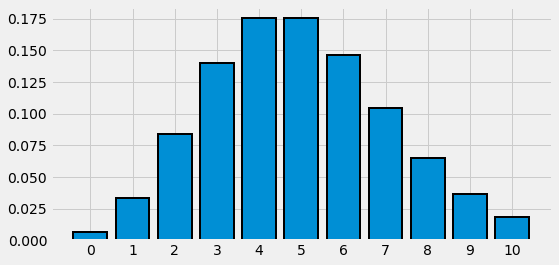

In [8]:
mu = 5
max_events = 10

plot_discrete_distribution(f = stats.poisson,
                           x_axis = np.arange(max_events + 1),
                           mu = mu)

---

#### RVS

Min: 0
Mean: 4.942
Median: 5.0
Max: 13
Variance: 4.900636
Standard Deviation: 2.2137380152131825


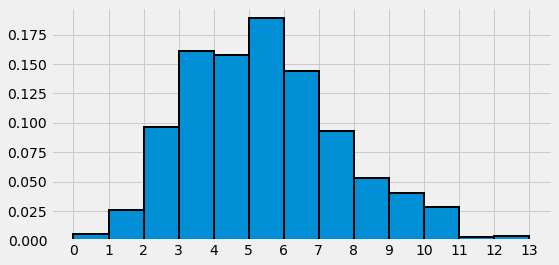

In [9]:
mu = 5

sample = sample_discrete_distribution(f = stats.poisson,
                                      size = 1000,
                                      mu = 5)

---

**[Esempio]** Un nanogrammo di Plutonio presenta in media 2.3 decay radioattivi al secondo e tale numero di decay segue una distro di Poisson. Qual è la probabilità che in due secondi ci siano esattamente 3 decay?

In [10]:
rate = 2.3 * 2
stats.poisson.pmf(k = 3, mu = rate)

0.1630675806732757

Occhio che *lambda* è la media di decay al secondo per il numero di secondi considerati, cioè 2!

Plottiamo anche tutta la *PMF*:

Mean: 4.6
Median: 4.0
Variance: 4.6
Standard Deviation: 2.1447610589527217
----------


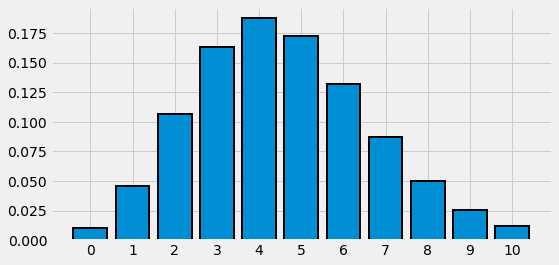

In [11]:
mu = 2.3 * 2
max_events = 10

plot_discrete_distribution(f = stats.poisson,
                           x_axis = np.arange(max_events + 1),
                           mu = mu)

E qual è la probabilità che non si verifichino più di 3 decay?

In [12]:
rate = 2.3 * 2

np.sum(stats.poisson.pmf(k = [0, 1, 2, 3], mu = rate))

0.3257062830214471

---